<a href="https://colab.research.google.com/github/ms0753/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [5]:
titanic = pd.read_table('train.csv',sep=',')
titanic.head()
print(titanic.isnull().sum())
titanic = titanic.dropna()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Survived         0
dtype: int64


In [6]:
titanic.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514,0.406162
std,259.119524,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.491460
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,677.750000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000


<Axes: >

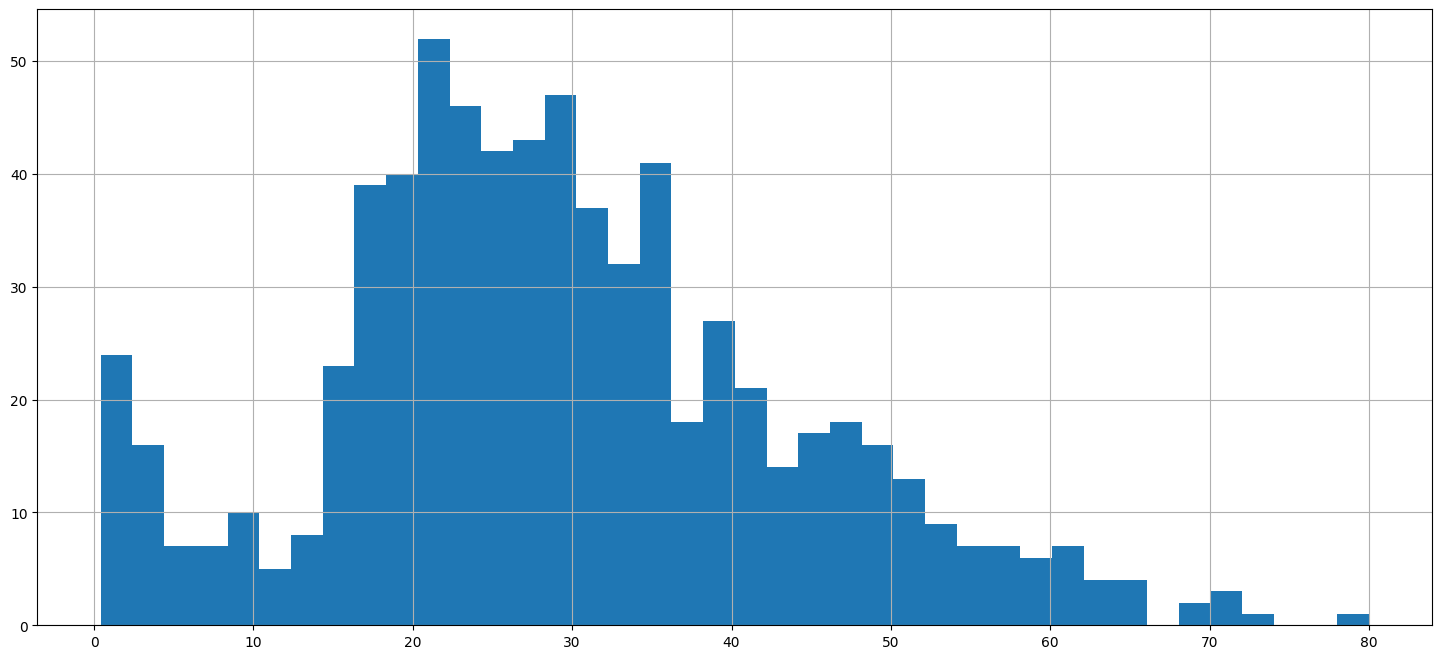

In [7]:
titanic['Age'].hist(bins = 40, figsize = (18 , 8), grid = True)

In [9]:
titanic['Age_cat'] = pd.cut(titanic['Age'], bins = [0, 3, 7, 15, 30, 60, 100], include_lowest = True, labels = ['baby','children','teenage','young','adult','old'])
titanic.groupby('Age_cat').mean()

<ipython-input-9-04dbc22f1e5c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('Age_cat').mean()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Age_cat,,,,,,,,
baby,396.700000,2.533333,0.400000,1.672333,1.733333,1.366667,33.364307,0.666667
children,466.700000,2.650000,0.600000,4.950000,1.750000,1.350000,27.905830,0.700000
teenage,442.060606,2.696970,0.575758,11.500000,1.727273,1.121212,35.217430,0.454545
young,435.058282,2.426380,0.352761,23.262270,0.355828,0.263804,28.015413,0.358896
adult,470.388693,1.954064,0.353357,41.132509,0.363958,0.392226,42.429225,0.420495
old,432.545455,1.590909,0.136364,66.022727,0.136364,0.272727,41.371214,0.227273


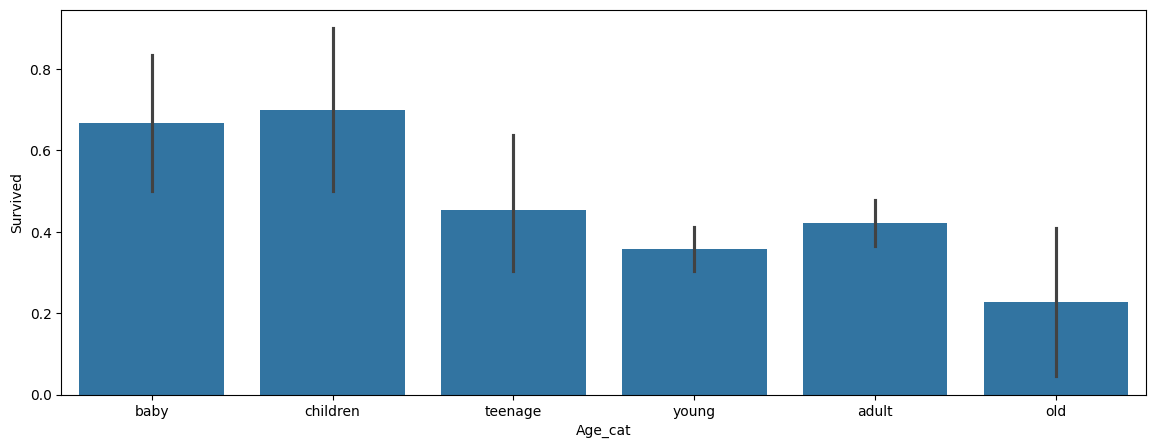

In [10]:
plt.figure(figsize = (14,5))
sb.barplot(x='Age_cat', y='Survived', data=titanic)
plt.show()

# **당뇨병 환자 데이터분석**

In [12]:
diabetes = pd.read_table('diabetes.csv',sep=',')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
print(diabetes.isnull().sum())
diabetes = diabetes.dropna()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:
corr = diabetes.corr(method = 'pearson')
corr = corr[corr.Outcome != 1]
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356


<Axes: >

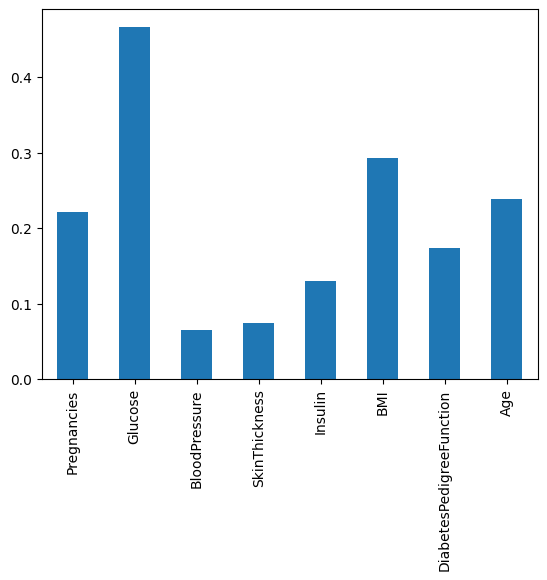

In [17]:
corr['Outcome'].plot.bar()